1. Data Collection

In [44]:
# a Load the dataset

import pandas as pd

df = pd.read_csv('student-mat.csv', sep=';')



In [45]:
# b) Explore the dataset
df.head()
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [46]:
print(df.columns.tolist())


['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


2. Data Preprocessing

In [47]:
# Handle missing values
print(df.isnull().sum())


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


No missing values were detected in the dataset, so no imputation or deletion was necessary during preprocessing.

3. Encoding Categorical Variables

In [57]:
#Identify
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)


Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


In [58]:
# Label Encode Binary Categories
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

binary_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus',
               'schoolsup', 'famsup', 'paid', 'activities',
               'nursery', 'higher', 'internet', 'romantic']

for col in binary_cols:
    df[col] = le.fit_transform(df[col])


In [59]:
# One-Hot Encode Multi-Class Categories
multi_cat_cols = ['Mjob', 'Fjob', 'reason', 'guardian']

df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)


Feature Scaling

###### StandardScaler to scale numerical features to have mean = 0 and standard deviation = 1.

In [60]:
from sklearn.preprocessing import StandardScaler

# Example of columns to scale (adjust based on your dataset structure)
features_to_scale = ['age', 'studytime', 'failures', 'absences', 'G1', 'G2']

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


In [61]:
# Create binary target: 1 = pass (G3 >= 10), 0 = fail
df['pass'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)


In [62]:
from sklearn.model_selection import train_test_split

# Features and target for classification
X = df.drop(['G3', 'pass'], axis=1)
y = df['pass']  # binary classification target

# Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
# Features and target for regression
X = df.drop(['G3'], axis=1)
y = df['G3']  # regression target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

log_reg = LogisticRegression(max_iter=500)  # Increase iterations from 100 to 500
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)


# Decision Tree Classifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)


In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)


In [70]:
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log, average='weighted'))



Logistic Regression:
Accuracy: 0.34177215189873417
F1 Score: 0.32236953142349545


compare the results between Logistic Regression and Decision Tree

In [71]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Logistic Regression metrics
acc_log = accuracy_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log, average='weighted')  # or 'macro'

# Decision Tree metrics
acc_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')

print("Logistic Regression:")
print(f"Accuracy: {acc_log:.4f}")
print(f"F1 Score: {f1_log:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_log))

print("\nDecision Tree Classifier:")
print(f"Accuracy: {acc_tree:.4f}")
print(f"F1 Score: {f1_tree:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))


Logistic Regression:
Accuracy: 0.3418
F1 Score: 0.3224
Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.20      0.17         5
           5       0.00      0.00      0.00         4
           6       0.67      0.33      0.44         6
           7       0.00      0.00      0.00         1
           8       0.29      0.67      0.40         6
           9       1.00      0.20      0.33         5
          10       0.57      0.73      0.64        11
          11       0.11      0.20      0.14         5
          12       0.50      0.20      0.29         5
          13       0.33      0.20      0.25         5
          14       0.25      0.33      0.29         6
          15       0.44      0.40      0.42        10
          16       0.33      0.25      0.29         4
          17       0.00      0.00      0.00         3
          18       0.25      1.00      0.40         1
          19       0.00      0.00      0.00         2

  

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/

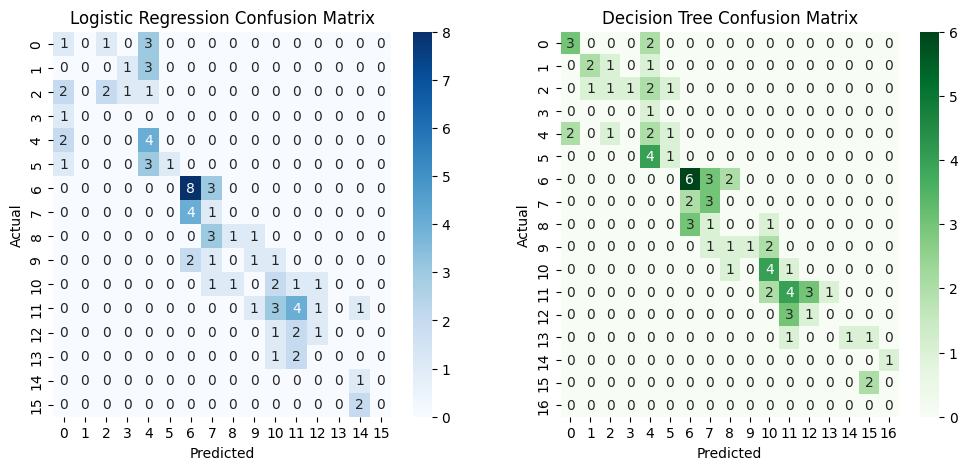

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

cm_log = confusion_matrix(y_test, y_pred_log)
cm_tree = confusion_matrix(y_test, y_pred_tree)

fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(cm_log, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_tree, annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.show()


Key observations:
Logistic Regression:
Seems to have more clear diagonals in some classes (e.g., class 6 has 8 correct predictions).

Some classes (e.g., 0, 1, 2) have more misclassifications.

The overall prediction is somewhat sparse, but the model tends to predict fewer classes confidently.

Decision Tree:
Also has correct predictions across multiple classes, but the distribution is slightly different.

Some classes have better true positive counts than Logistic Regression (e.g., class 0 predicted 3 correctly vs 1 for Logistic Regression).

More scattered predictions, possibly indicating overfitting or more complexity.

 Calculate overall metrics:




In [73]:
from sklearn.metrics import accuracy_score, f1_score

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

print("Logistic Regression F1 Score:", f1_score(y_test, y_pred_log, average='weighted'))
print("Decision Tree F1 Score:", f1_score(y_test, y_pred_tree, average='weighted'))

Logistic Regression Accuracy: 0.34177215189873417
Decision Tree Accuracy: 0.379746835443038
Logistic Regression F1 Score: 0.32236953142349545
Decision Tree F1 Score: 0.3694590663611316


In [74]:
from sklearn.metrics import classification_report

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_tree))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.14      0.20      0.17         5
           5       0.00      0.00      0.00         4
           6       0.67      0.33      0.44         6
           7       0.00      0.00      0.00         1
           8       0.29      0.67      0.40         6
           9       1.00      0.20      0.33         5
          10       0.57      0.73      0.64        11
          11       0.11      0.20      0.14         5
          12       0.50      0.20      0.29         5
          13       0.33      0.20      0.25         5
          14       0.25      0.33      0.29         6
          15       0.44      0.40      0.42        10
          16       0.33      0.25      0.29         4
          17       0.00      0.00      0.00         3
          18       0.25      1.00      0.40         1
          19       0.00      0.00      0.00         2

    accuracy                           0.34        

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/